# Read congressional data

In [23]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

In [2]:
# Read SenatorCleaned.csv

df_senate = pd.read_csv('../Data/SenatorCleaned.csv')

In [3]:
df_senate

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
0,1,Sheldon Whitehouse,11/25/2014,Self,M,"Macy's, Inc. (NYSE)",Stock,Purchase,1001.0,--
1,2,Sheldon Whitehouse,12/18/2014,Self,BEAV,B/E Aerospace Inc. (NASDAQ),Stock,Sale (Full),15001.0,--
2,3,Sheldon Whitehouse,12/18/2014,Self,KORS,Michael Kors Holdings Limited (NYSE),Stock,Sale (Partial),1001.0,--
3,4,Sheldon Whitehouse,12/18/2014,Self,T,"AT&T, Inc. (NYSE)",Stock,Purchase,1001.0,--
4,5,Sheldon Whitehouse,12/18/2014,Self,KEYS,"Keysight Technologies, Inc. (NYSE)",Stock,Sale (Full),1001.0,Agilent Tech common stock completed a spinoff ...
...,...,...,...,...,...,...,...,...,...,...
15661,15662,Lamar Alexander,5/31/2019,Spouse,--,Little Star Partnership\r\nCompany: Little Sta...,Other Securities,Purchase,100001.0,Little Star Partnership is a family Company ow...
15662,15663,Lamar Alexander,4/1/2016,Spouse,--,Montgomery County\r\nRate/Coupon: 5.00\r\nMatu...,Municipal Security,Sale (Full),15001.0,--
15663,15664,Lamar Alexander,9/6/2017,Spouse,--,Sevier County Tenn Pub Bldg\r\nRate/Coupon: 5....,Municipal Security,Purchase,50001.0,--
15664,15665,Lamar Alexander,9/7/2017,Spouse,--,Wilson County Tenn GO\r\nRate/Coupon: 5.00%\r\...,Municipal Security,Purchase,50001.0,--


In [4]:
df_senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15666 non-null  int64  
 1   Name              15666 non-null  object 
 2   Transaction.Date  15666 non-null  object 
 3   Owner             15666 non-null  object 
 4   Ticker            15666 non-null  object 
 5   Asset.Name        15666 non-null  object 
 6   Asset.Type        14250 non-null  object 
 7   Type              15666 non-null  object 
 8   Amount            15665 non-null  float64
 9   Comment           15666 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [5]:
# stock_prices_2023_to_now
df_stock_price = pd.read_csv('../Data/stock_prices_2023_to_now.csv')

In [6]:
df_stock_price

,Date,Ticker,Close
0,2023-01-03,AAGIY,45.799999
1,2023-01-03,AAP,151.539993
2,2023-01-03,AAPL,125.070000
3,2023-01-03,ABBV,162.380005
4,2023-01-03,ABNB,84.900002
...,...,...,...
187121,2024-07-17,X,38.139999
187122,2024-07-17,XNGSY,30.719999
187123,2024-07-17,XOM,117.639999
187124,2024-07-17,Z,52.720001


In [7]:
df_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187126 entries, 0 to 187125
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    187126 non-null  object 
 1   Ticker  187126 non-null  object 
 2   Close   187126 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.3+ MB


In [8]:
# congress-trading-all
#df_congress = pd.read_csv('../Data/congress-trading-all.csv', encoding="utf-16")

In [9]:
df_senate['Ticker'].unique()

array(['M', 'BEAV', 'KORS', ..., 'KERX', 'ETFC', 'ACUS'], dtype=object)

In [10]:
len(df_senate['Ticker'].unique())

1367

In [20]:
len(df_senate[df_senate['Ticker'] == 'KORS'])

11

In [21]:
df_senate[df_senate['Amount'].isnull()]

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
4825,7181,James M Inhofe,10/5/2015,Self,WFM,WFM,Stock,Sale (Full),NaN,--


In [25]:
df_senate['Asset.Type'].unique()

array(['Stock', 'Corporate Bond', 'Non-Public Stock', 'Other Securities',
       'Municipal Security', 'Stock Option',
       'Commodities/Futures Contract', 'Cryptocurrency', nan, 'Bond'],
      dtype=object)

In [26]:
df_senate[df_senate['Asset.Type'] == 'Non-Public Stock']

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
577,578,Mark R Warner,10/19/2018,Self,--,"Acumen Pharmaceutical, Inc.\r\nCompany: Acumen...",Non-Public Stock,Purchase,100001.0,--
584,585,Mark R Warner,9/7/2018,Self,--,"Snap + Style, Inc.\r\nCompany: Snap + Style, I...",Non-Public Stock,Purchase,50001.0,--
586,587,Mark R Warner,11/20/2020,Self,--,"Acumen Pharmaceuticals, Inc.\r\nCompany: Acume...",Non-Public Stock,Purchase,50001.0,--
589,590,Mark R Warner,6/16/2021,Self,--,"Acumen Pharmaceuticals, Inc.\r\nCompany: Acume...",Non-Public Stock,Purchase,15001.0,"As of 7/1/21, Acumen Pharmaceuticals, Inc. is ..."
596,597,Mark R Warner,12/19/2018,Self,--,"RideCharge, Inc.\r\nCompany: RideCharge, Inc. ...",Non-Public Stock,Sale (Full),250001.0,Underlying asset of Alexandria RC Investors LLC
...,...,...,...,...,...,...,...,...,...,...
12432,7670,Steve Daines,6/2/2017,Joint,--,"Bridger Technologies, Inc.",Non-Public Stock,Sale (Full),15001.0,--
12433,7671,Steve Daines,6/2/2017,Self,--,"Bridger Technologies, Inc.",Non-Public Stock,Sale (Full),15001.0,--
15619,15620,Lamar Alexander,12/15/2015,Spouse,--,Custom Foods of America Inc.\r\nCompany: Custo...,Non-Public Stock,Sale (Partial),250001.0,Sold to Lamar Alexander Family Trust
15621,15622,Lamar Alexander,12/15/2015,Self,--,Custom Foods of America Inc.\r\nCompany: Custo...,Non-Public Stock,Sale (Partial),250001.0,Sold to Leslee B Alexander Family Trust


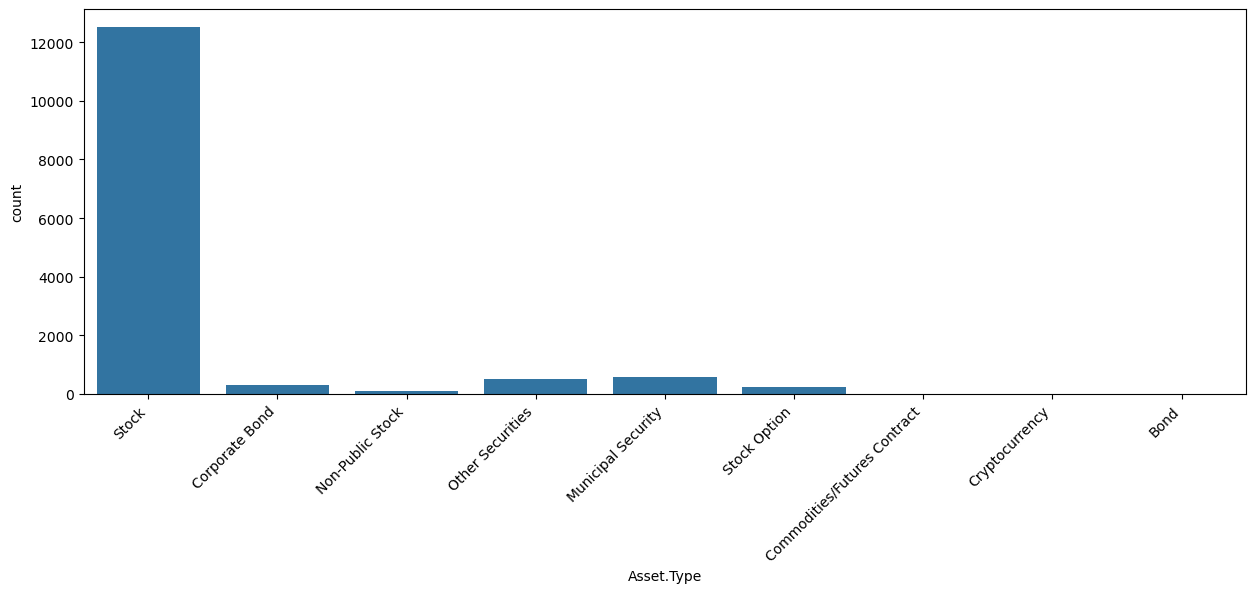

In [32]:
plt.figure(figsize = (15, 5))
sns.countplot(data=df_senate, x='Asset.Type')
plt.xticks(rotation=45, ha='right')  # Rotate labels if needed
plt.show()

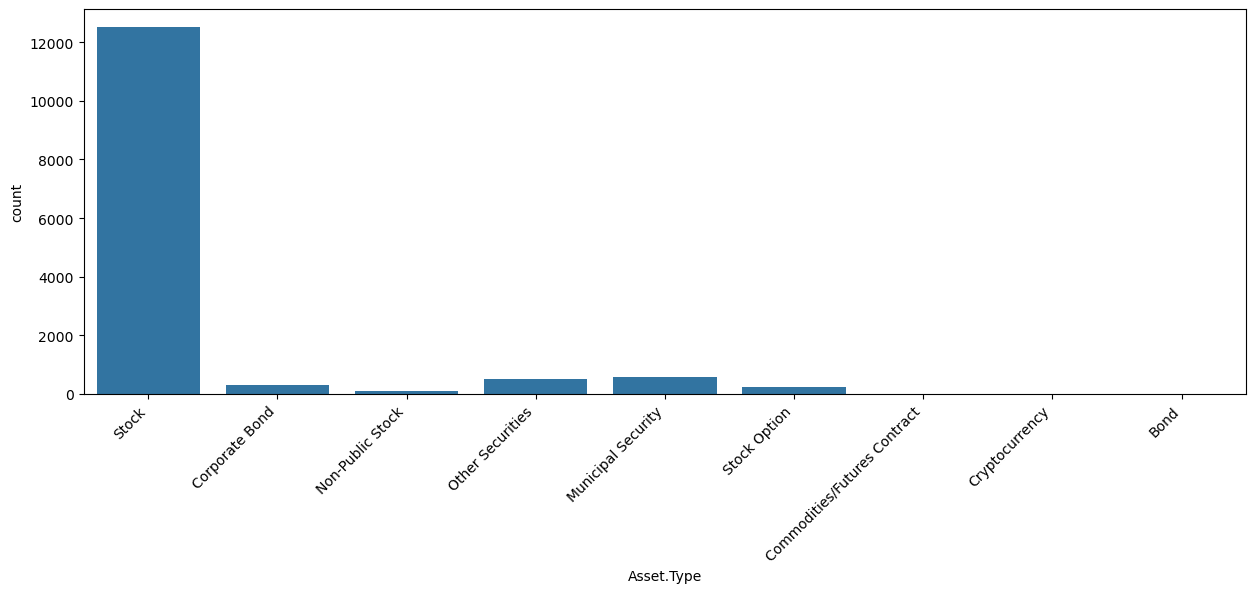

In [36]:
#df['asset_percentage'] = df_senate['Asset.Type'].value_counts(normalize=True, sort=False)
plt.figure(figsize = (15, 5))
sns.countplot(data=df_senate, x='Asset.Type')
plt.xticks(rotation=45, ha='right')  # Rotate labels if needed
plt.show()

In [37]:
df_senate[df_senate['Ticker']=='F']

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
486,487,Sheldon Whitehouse,11/10/2014,Self,F,Ford Motor Co. (NYSE),Stock,Sale (Full),1001.0,--
489,490,Sheldon Whitehouse,11/10/2014,Joint,F,Ford Motor Co. (NYSE),Stock,Sale (Full),1001.0,--
751,752,Thomas H Tuberville,2/8/2021,Joint,F,Ford Motor Company\r\nOption Type: Put\r\nStri...,Stock Option,Sale (Full),1001.0,--
820,821,Thomas H Tuberville,7/30/2021,Joint,F,Ford Motor Company Common Stock\r\nOption Type...,Stock Option,Sale (Full),15001.0,--
1706,1707,Pat Roberts,6/6/2014,Spouse,F,Ford Motor Co. (NYSE),Stock,Sale (Full),1001.0,--
5264,7203,John Hoeven,12/28/2016,Self,F,Ford Motor Company,Stock,Sale (Full),100001.0,--
5312,7266,John Hoeven,12/28/2016,Self,F,Ford Motor Company,Stock,Sale (Full),100001.0,--
5433,7401,John Hoeven,12/28/2016,Self,F,Ford Motor Company,Stock,Sale (Full),100001.0,--
7175,247,Sheldon Whitehouse,9/7/2018,Joint,F,Ford Motor Company,Stock,Purchase,1001.0,--
7284,352,Sheldon Whitehouse,12/28/2018,Self,F,Ford Motor Company,Stock,Sale (Full),1001.0,--


In [38]:
df_senate[df_senate['Asset.Type']=='Stock Option']

,Unnamed: 0,Name,Transaction.Date,Owner,Ticker,Asset.Name,Asset.Type,Type,Amount,Comment
659,660,Thomas H Tuberville,5/6/2021,Joint,X,United States Steel Corporation\r\nOption Type...,Stock Option,Sale (Full),1001.0,--
660,661,Thomas H Tuberville,5/6/2021,Joint,X,United States Steel Corporation\r\nOption Type...,Stock Option,Sale (Full),1001.0,--
661,662,Thomas H Tuberville,5/6/2021,Joint,X,United States Steel Corporation\r\nOption Type...,Stock Option,Sale (Full),1001.0,--
662,663,Thomas H Tuberville,5/6/2021,Joint,X,United States Steel Corporation\r\nOption Type...,Stock Option,Sale (Full),1001.0,--
663,664,Thomas H Tuberville,5/6/2021,Joint,X,United States Steel Corporation\r\nOption Type...,Stock Option,Sale (Full),15001.0,--
...,...,...,...,...,...,...,...,...,...,...
15576,15577,Roy Blunt,12/2/2019,Spouse,MDLZ,"Mondelez International, Inc.\r\nOption Type: N...",Stock Option,Sale (Full),50001.0,Option as part of compensation from employer p...
15577,15578,Roy Blunt,11/26/2019,Spouse,KHC,The Kraft Heinz Company\r\nOption Type: Neithe...,Stock Option,Sale (Full),1001.0,Option received as part of compensation.
15581,15582,Roy Blunt,12/30/2015,Spouse,--,MDLZ (stock option)\r\nOption Type: Neither\r\...,Stock Option,Sale (Full),50001.0,--
15585,15586,Roy Blunt,12/2/2019,Spouse,MDLZ,"Mondelez International, Inc.\r\nOption Type: N...",Stock Option,Sale (Partial),50001.0,Option as part of compensation from employer p...
